## From: https://stackoverflow.com/questions/35373714/reverse-legend-order-pandas-plot

In [1]:
import pandas as pd
import numpy as np
import math

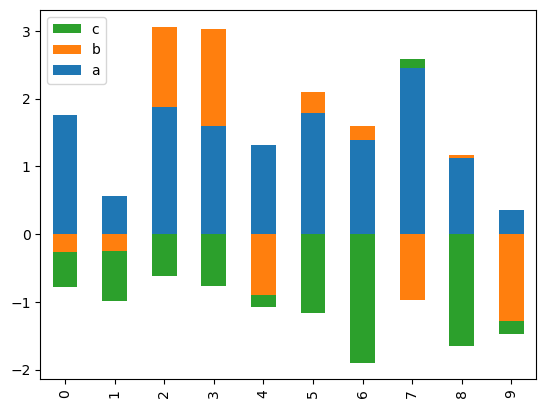

In [2]:
df = pd.DataFrame({'a': np.random.randn(10) + 1, 'b': np.random.randn(10),
                   'c': np.random.randn(10) - 1}, columns=['a', 'b', 'c'])
ax = df.plot(kind='bar', stacked=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')  # reverse both handles and labels

In [3]:
np.random.seed(2019)

# Hard-code the custom ordering of categories
categories = ['unsure', '<25%', '25 - 50%', '50 - 75%', '75 - 100%']

# Generate some example data
# I'm not sure if this matches your input exactly
df_orig = pd.DataFrame({'District': np.random.choice(list('ABCDE'), size=100), 
                        'Portion of income': np.random.choice(categories + [np.nan], size=100)})

In [4]:
df_orig.head()

,District,Portion of income
0,A,25 - 50%
1,C,75 - 100%
2,A,75 - 100%
3,A,<25%
4,E,<25%


In [5]:
# Unchanged from your code. Note that value_counts() returns a 
# Series, but you name it df
df = df_orig.groupby('District')['Portion of income'].value_counts(dropna=False)
df = df.groupby('District').transform(lambda x: 100*x/sum(x))
print (len(df.index))
df.head()

29


District  Portion of income
A         unsure               27.586207
          <25%                 20.689655
          25 - 50%             17.241379
          75 - 100%            17.241379
          50 - 75%             10.344828
Name: Portion of income, dtype: float64

In [6]:
# In my example data, np.nan was cast to the string 'nan', so 
# I have to drop it like this
df = df.drop(labels='nan', level=1)

In [7]:
# Instead of plotting right away, unstack the MultiIndex
# into columns, then convert those columns to a CategoricalIndex 
# with custom sort order
df = df.unstack()
df

Portion of income,unsure,<25%,25 - 50%,75 - 100%,50 - 75%
District,,,,,
A,27.586207,20.689655,17.241379,17.241379,10.344828
B,23.529412,23.529412,11.764706,11.764706,17.647059
C,19.047619,9.523810,4.761905,28.571429,14.285714
D,21.428571,NaN,21.428571,7.142857,21.428571
E,26.315789,10.526316,10.526316,15.789474,15.789474


In [8]:
df.columns = pd.CategoricalIndex(df.columns.values, 
                                 ordered=True, 
                                 categories=categories)

In [9]:
df.head()

,unsure,<25%,25 - 50%,75 - 100%,50 - 75%
District,,,,,
A,27.586207,20.689655,17.241379,17.241379,10.344828
B,23.529412,23.529412,11.764706,11.764706,17.647059
C,19.047619,9.523810,4.761905,28.571429,14.285714
D,21.428571,NaN,21.428571,7.142857,21.428571
E,26.315789,10.526316,10.526316,15.789474,15.789474


In [10]:
# Sort the columns (axis=1) by the new categorical ordering
df = df.sort_index(axis=1)

# Income Level sort for stacked Bar -- see 75 is first?
  * https://stackoverflow.com/questions/54874269/ordering-of-elements-in-pandas-stacked-bar-chart

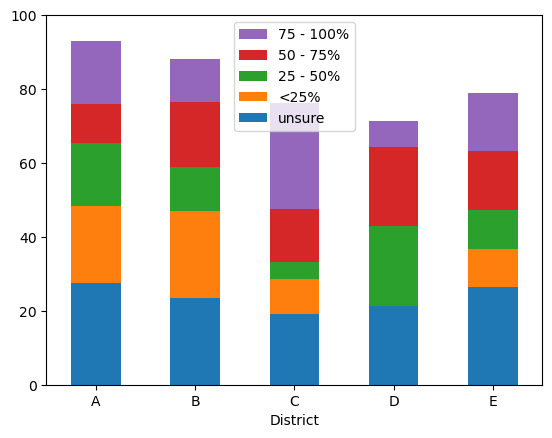

In [11]:
# Plot
ax = df.plot.bar(stacked=True, rot=0)
ax.set_ylim(ymax=100)

# Matplotlib idiom to reverse legend entries 
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

In [12]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

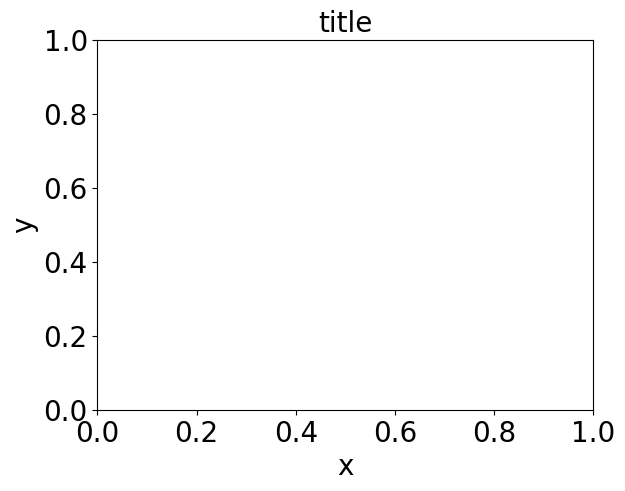

In [14]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

# Sort a boxplot by Median (or Mean)
  * https://stackoverflow.com/questions/21912634/how-can-i-sort-a-boxplot-in-pandas-by-the-median-values

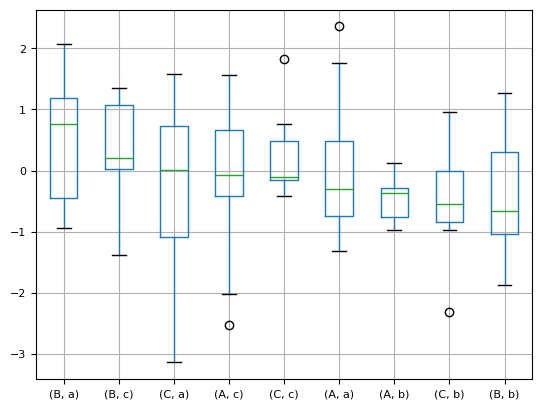

In [15]:
import random
import matplotlib.pyplot as plt

n = 100
# this is probably a strange way to generate random data; please feel free to correct it
df = pd.DataFrame({"X": [random.choice(["A","B","C"]) for i in range(n)], 
                   "Y": [random.choice(["a","b","c"]) for i in range(n)],
                   "Z": [random.gauss(0,1) for i in range(n)]})
grouped = df.groupby(["X", "Y"])

df2 = pd.DataFrame({col:vals['Z'] for col,vals in grouped})

meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]
df2.boxplot()

plt.show()

# Change font size of existing plot
  * https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

In [16]:
#import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Time delta to hours or days
  * https://stackoverflow.com/questions/22923775/calculate-time-difference-between-two-pandas-columns-in-hours-and-minutes

In [18]:
df = pd.DataFrame(columns=['to','fr','ans'])
df.to = [pd.Timestamp('2014-01-24 13:03:12.050000'), pd.Timestamp('2014-01-27 11:57:18.240000'), pd.Timestamp('2014-01-23 10:07:47.660000')]
df.fr = [pd.Timestamp('2014-01-26 23:41:21.870000'), pd.Timestamp('2014-01-27 15:38:22.540000'), pd.Timestamp('2014-01-23 18:50:41.420000')]
(df.fr-df.to).astype('timedelta64[h]')

0    58.0
1     3.0
2     8.0
dtype: float64

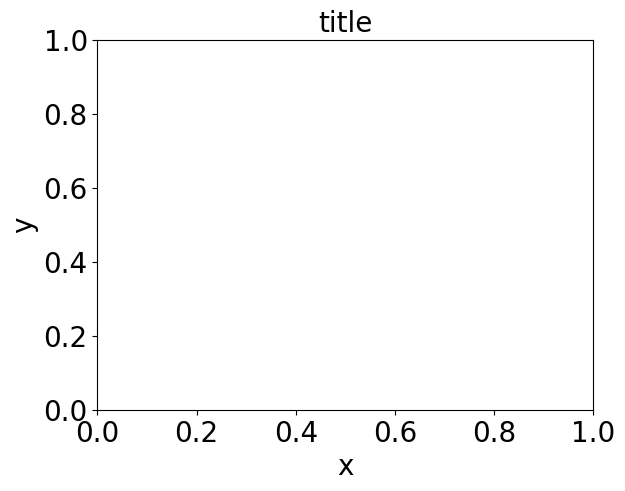

In [19]:
import matplotlib.pyplot as plt

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

# Done - ZZZZ